In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, combinations
from visualization import Hourly_plot, Daymean_plot, Monthly_plot, Correlation

# Load

In [3]:
Jd_df = pd.read_csv('/content/gdrive/MyDrive/SolarPower/Jindo_df.csv') 
print(Jd_df.shape)
Jd_df

(58118, 14)


,Temperature,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Solar radiation,Cloudy,Visibility,Time,Date,Power-plant,Photovoltaics,Month
0,12.8,0.9,200.0,83.0,1019.1,NaN,NaN,NaN,NaN,22,2014-05-09,전남 진도군,0.0,5
1,12.2,0.9,230.0,87.0,1019.0,NaN,NaN,NaN,NaN,23,2014-05-09,전남 진도군,0.0,5
2,11.4,0.2,0.0,82.0,1019.6,NaN,NaN,NaN,NaN,0,2014-05-10,전남 진도군,0.0,5
3,10.9,0.1,0.0,83.0,1019.4,NaN,NaN,NaN,NaN,1,2014-05-10,전남 진도군,0.0,5
4,15.6,2.6,110.0,77.0,1019.2,NaN,NaN,NaN,NaN,2,2014-05-10,전남 진도군,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58113,1.9,5.1,290.0,56.0,1026.5,NaN,NaN,9.0,2000.0,19,2020-12-31,전남 진도군,0.0,12
58114,1.9,4.2,320.0,63.0,1026.9,NaN,NaN,9.0,2000.0,20,2020-12-31,전남 진도군,0.0,12
58115,1.9,4.2,290.0,59.0,1026.9,NaN,NaN,9.0,2000.0,21,2020-12-31,전남 진도군,0.0,12
58116,1.6,5.1,320.0,65.0,1027.2,NaN,NaN,9.0,2000.0,22,2020-12-31,전남 진도군,0.0,12


In [4]:
Mp_df = pd.read_csv('/content/gdrive/MyDrive/SolarPower/Mokpo_df.csv', low_memory=False) 
print(Mp_df.shape)
Mp_df

(70127, 15)


,Temperature,Precipitation,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Solar radiation,Cloudy,Visibility,Time,Date,Power-plant,Photovoltaics,Month
0,7.2,NaN,5.7,320.0,66.0,1015.5,NaN,NaN,0.0,1100.0,0,2014-01-01,전남 영암군,0.0,1
1,6.5,NaN,5.3,340.0,72.0,1015.7,NaN,NaN,NaN,NaN,1,2014-01-01,전남 영암군,0.0,1
2,5.9,NaN,3.7,340.0,77.0,1015.9,NaN,NaN,NaN,NaN,2,2014-01-01,전남 영암군,0.0,1
3,5.1,NaN,3.6,360.0,74.0,1016.0,NaN,NaN,0.0,1100.0,3,2014-01-01,전남 영암군,0.0,1
4,4.7,NaN,3.7,360.0,75.0,1015.9,NaN,NaN,0.0,1100.0,4,2014-01-01,전남 영암군,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70122,-0.1,NaN,6.1,360.0,65.0,1031.6,NaN,NaN,7.0,2000.0,19,2021-12-31,전남 영암군,0.0,12
70123,-0.3,NaN,4.6,360.0,65.0,1032.0,NaN,NaN,6.0,2000.0,20,2021-12-31,전남 영암군,0.0,12
70124,-0.8,NaN,6.5,20.0,61.0,1032.0,NaN,NaN,3.0,2000.0,21,2021-12-31,전남 영암군,0.0,12
70125,-1.5,NaN,4.9,20.0,67.0,1032.5,NaN,NaN,5.0,2000.0,22,2021-12-31,전남 영암군,0.0,12


In [5]:
# 데이터 오류
Mp_df[Mp_df['Photovoltaics'] == ',0.00']

,Temperature,Precipitation,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Solar radiation,Cloudy,Visibility,Time,Date,Power-plant,Photovoltaics,Month
54579,5.6,NaN,1.1,320.0,91.0,1019.4,NaN,NaN,0.0,695.0,4,2020-03-24,전남 영암군,",0.00",3


In [6]:
Mp_df = Mp_df.replace(',0.00','0.00')
Mp_df = Mp_df.astype({'Photovoltaics':float})

In [7]:
Mp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70127 entries, 0 to 70126
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         70116 non-null  float64
 1   Precipitation       5082 non-null   float64
 2   Wind velocity       70119 non-null  float64
 3   Wind direction      69507 non-null  float64
 4   Humidity            69654 non-null  float64
 5   Sea-level pressure  70126 non-null  float64
 6   Sunshine            38147 non-null  float64
 7   Solar radiation     38365 non-null  float64
 8   Cloudy              61122 non-null  float64
 9   Visibility          67777 non-null  float64
 10  Time                70127 non-null  int64  
 11  Date                70127 non-null  object 
 12  Power-plant         70127 non-null  object 
 13  Photovoltaics       70115 non-null  float64
 14  Month               70127 non-null  int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 8.0

# Day plot

In [8]:
Jd_cols = [i for i in Jd_df.columns if i not in ['Date', 'Area', 'Power-plant', 'Time', 'Month']]
Mp_cols = [i for i in Mp_df.columns if i not in ['Date', 'Area', 'Power-plant', 'Time', 'Month']]

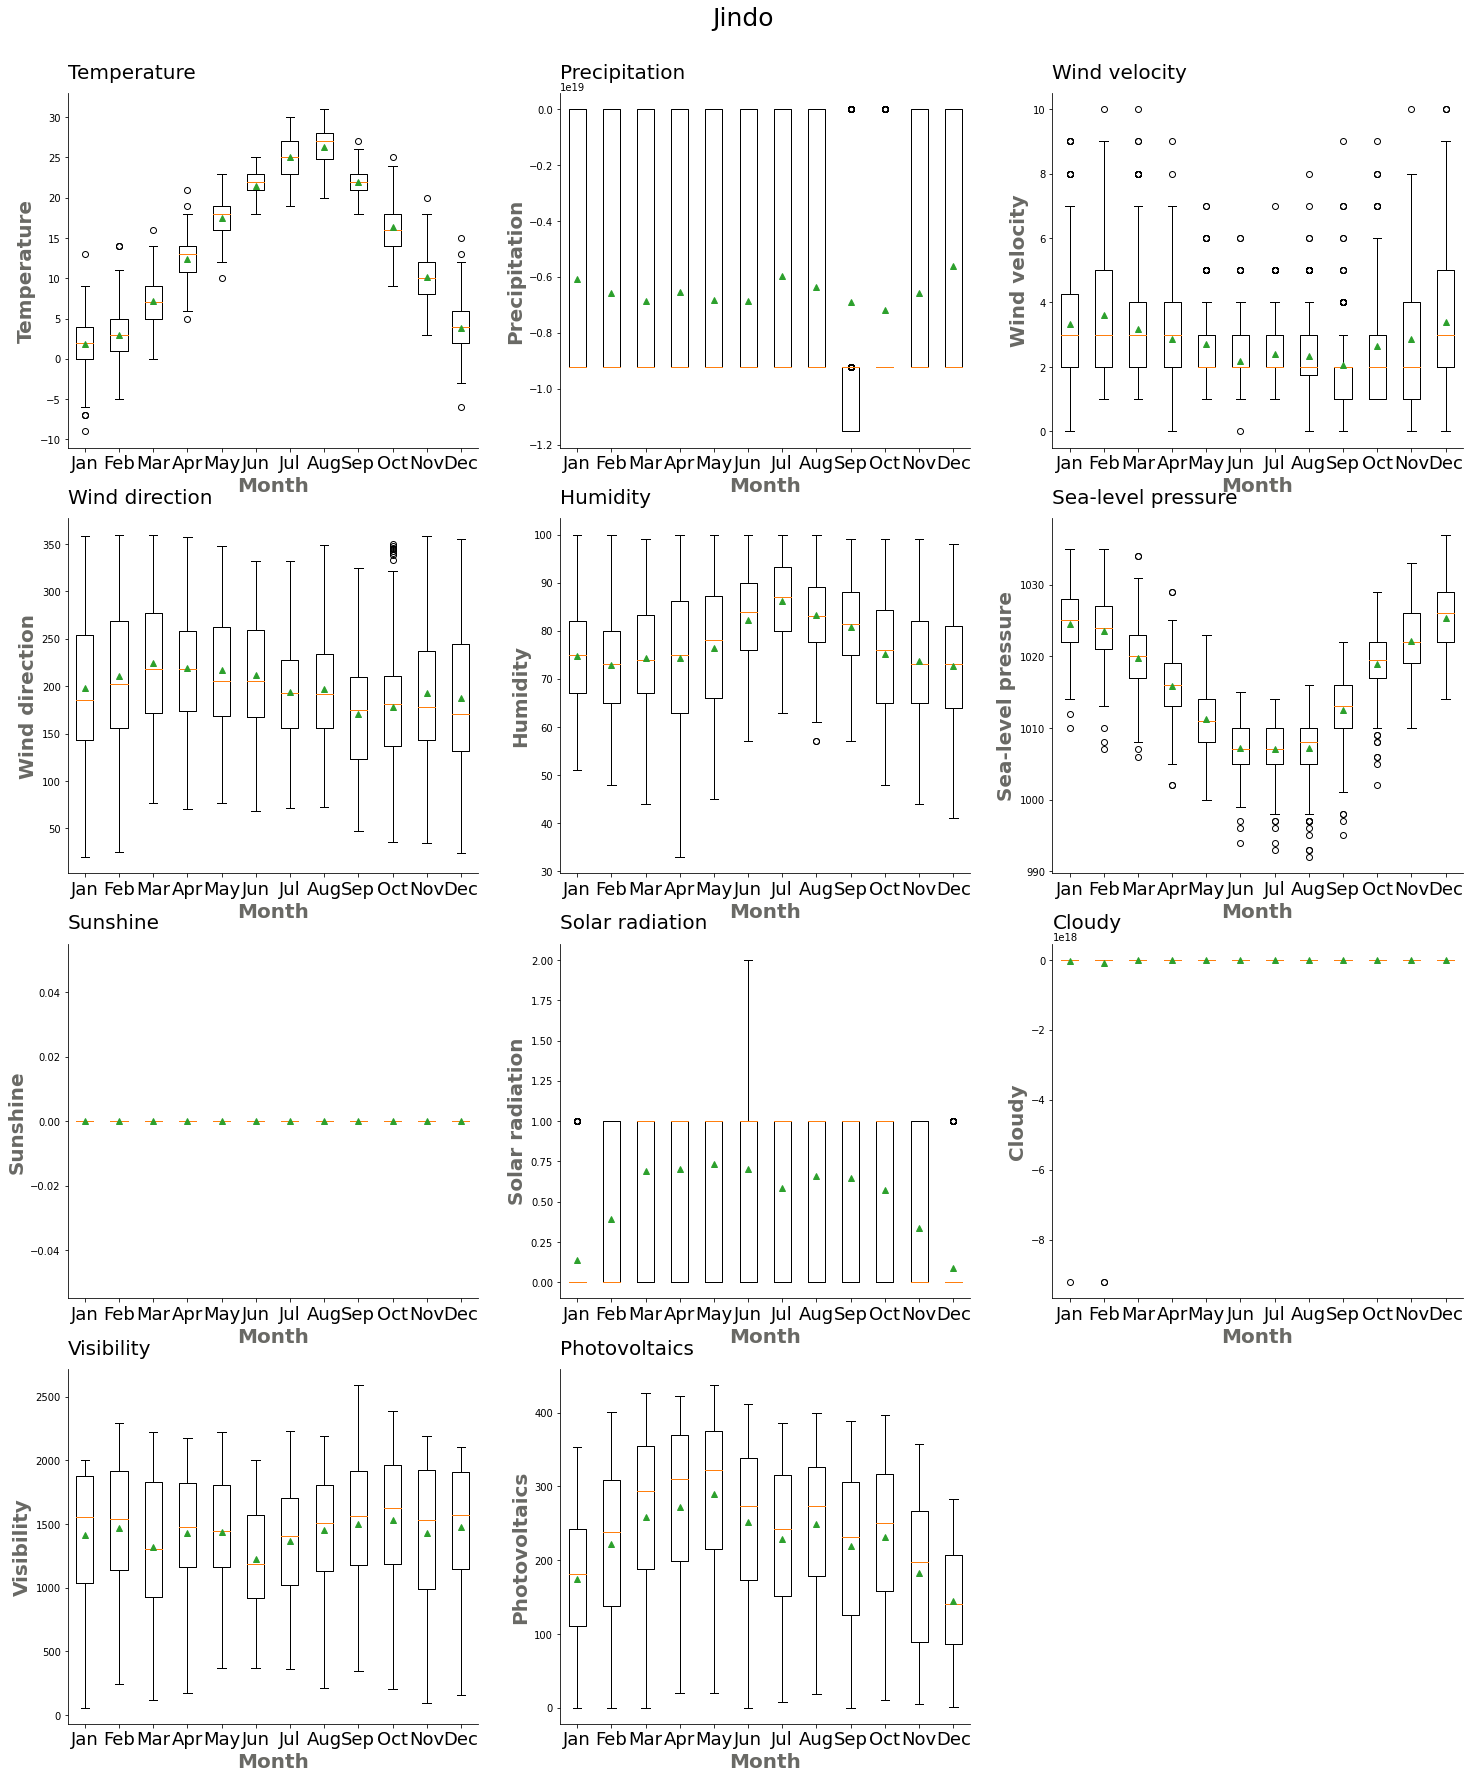

In [9]:
plt.figure(figsize=(25, 30))
plt.suptitle('Jindo', y=0.92, fontsize=25) 
for idx, i in enumerate(Mp_cols):
  ax = plt.subplot(4, 3, idx+1)
  Daymean_plot(Mp_df, i, ax, f'{i}')

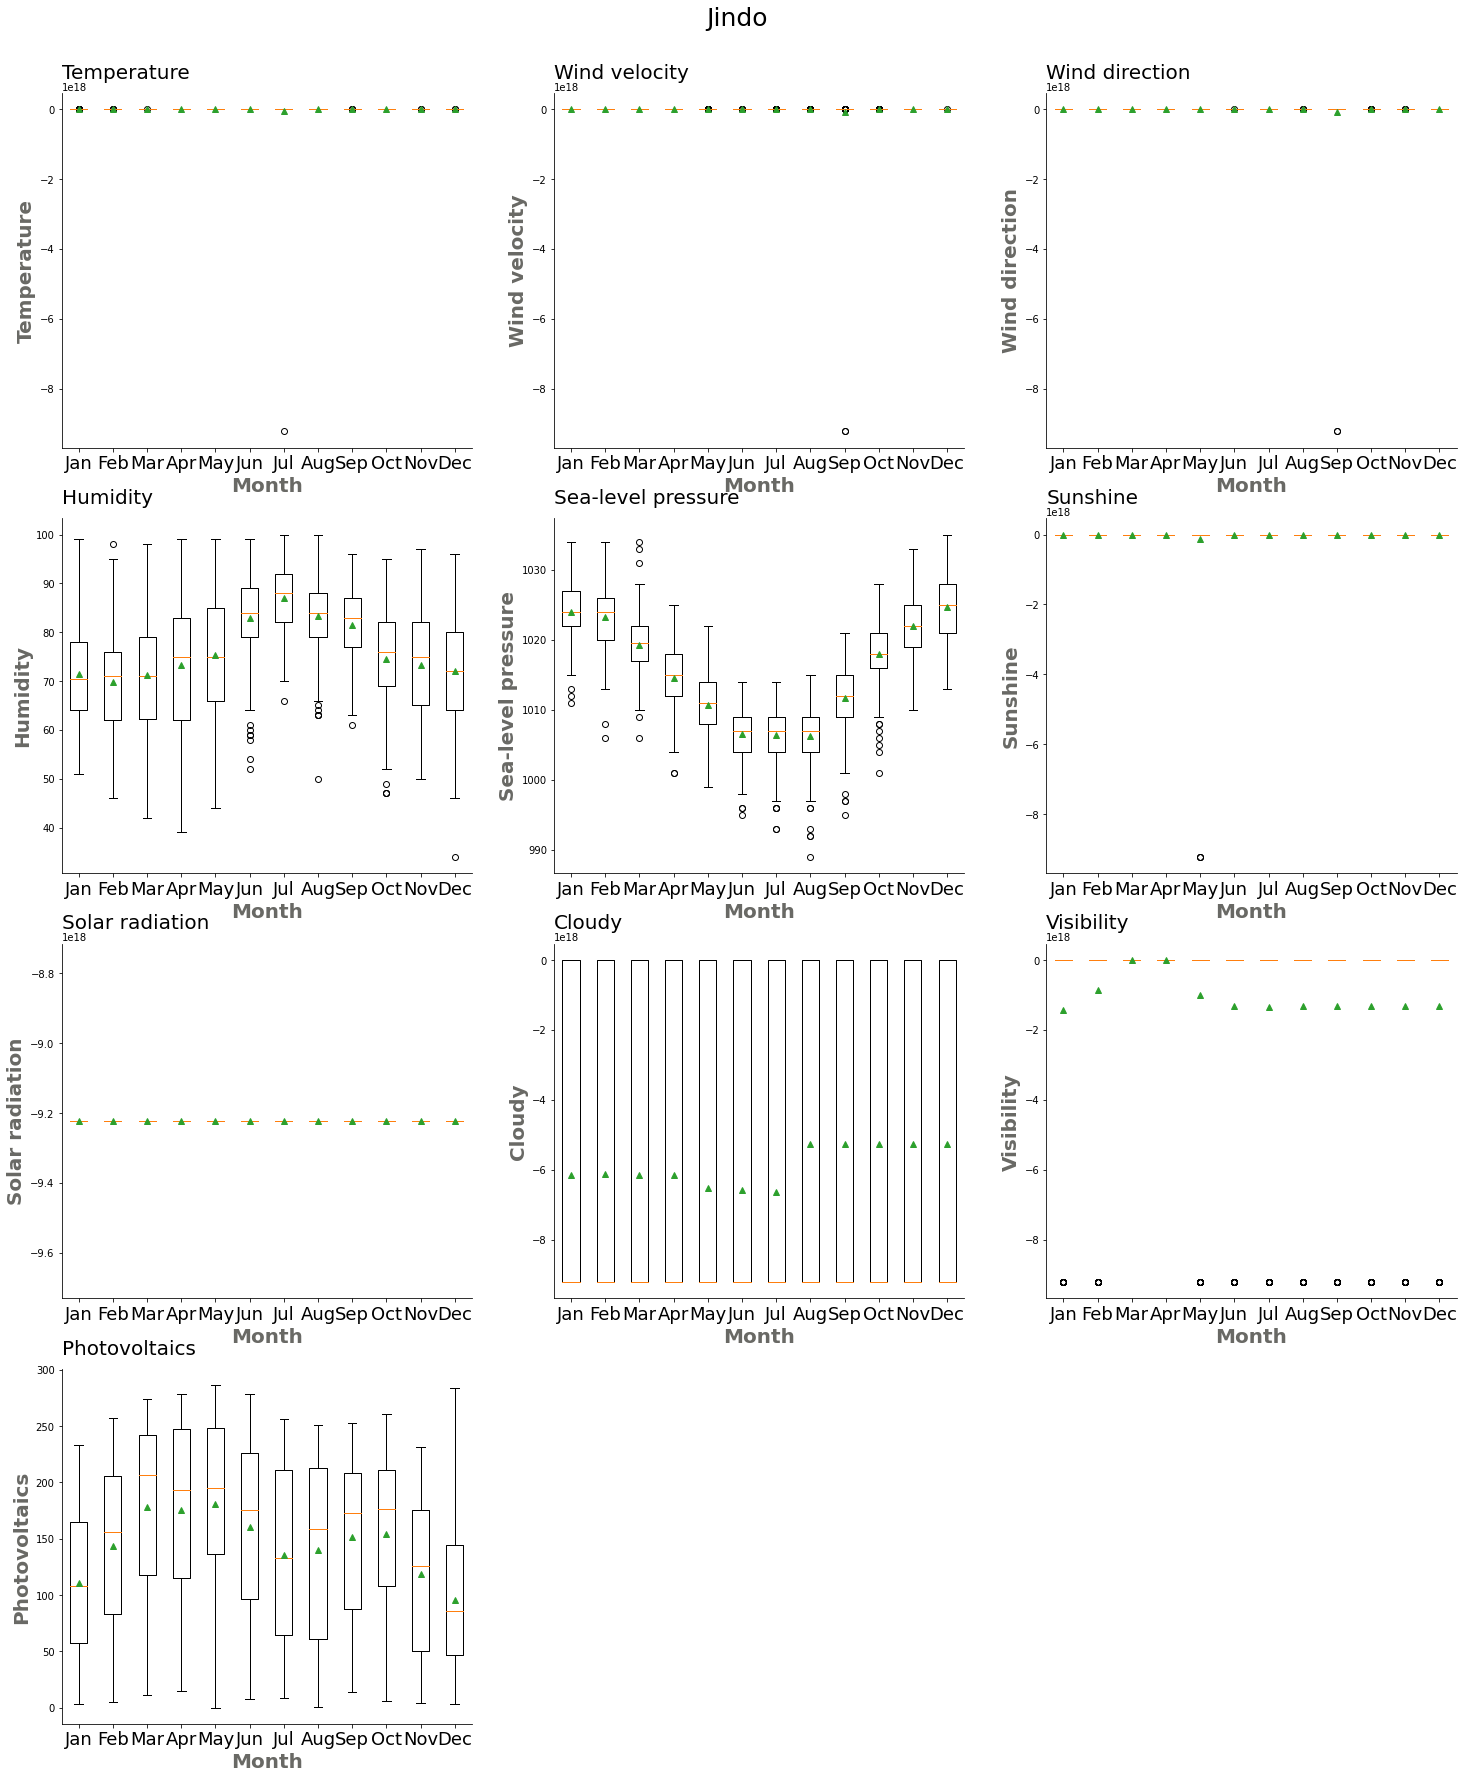

In [10]:
plt.figure(figsize=(25, 30))
plt.suptitle('Jindo', y=0.92, fontsize=25) 
for idx, i in enumerate(Jd_cols):
  ax = plt.subplot(4, 3, idx+1)
  Daymean_plot(Jd_df, i, ax, f'{i}')

# Correlation analysis

## Regional Correlation

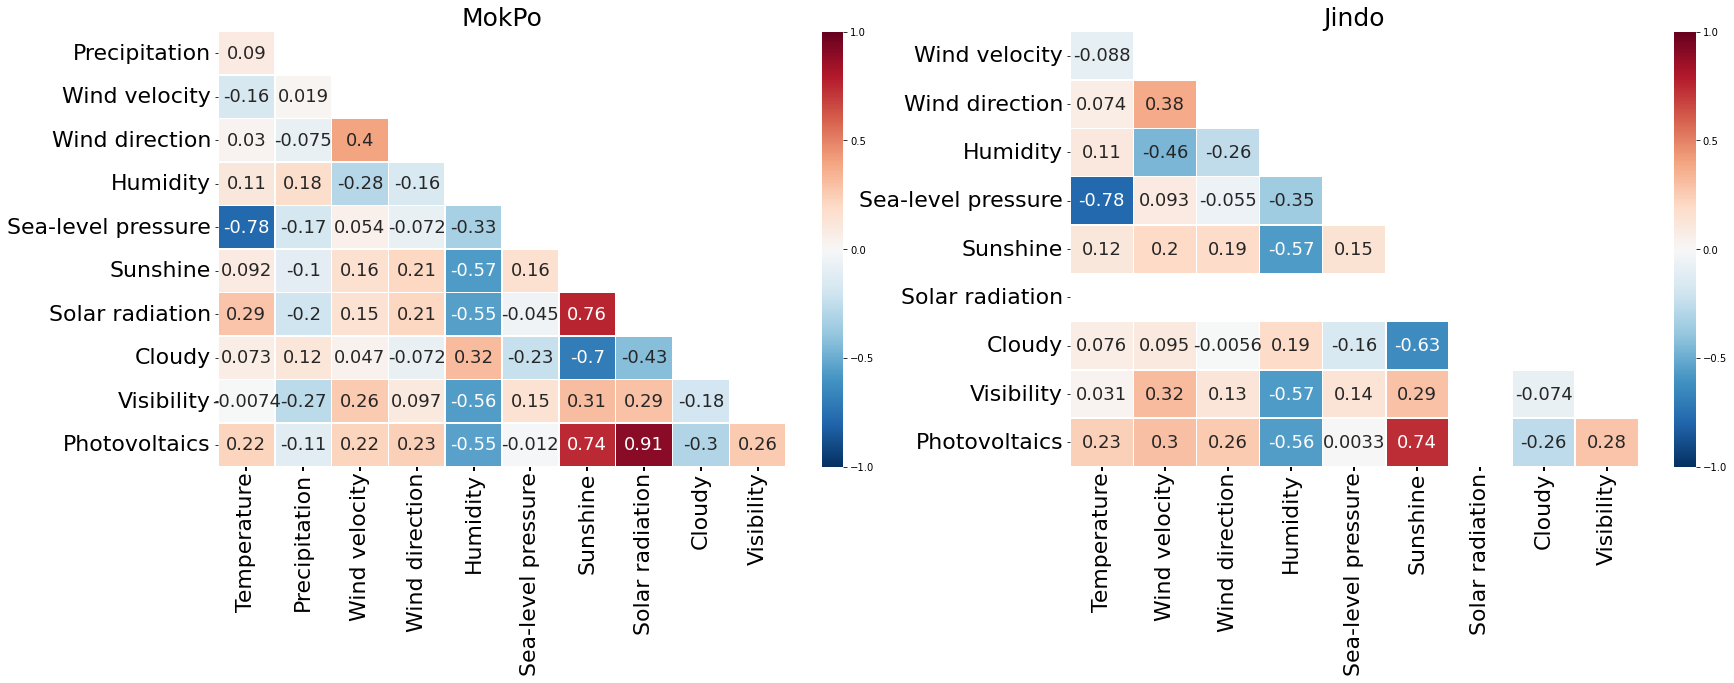

In [11]:
fig, (ax1, ax2) =  plt.subplots(figsize=(28,8), nrows=1, ncols=2)

ax1.set_title('MokPo', fontsize=25)
corr_Mp = Correlation(Mp_df, Mp_cols, ax1)
ax2.set_title('Jindo', fontsize=25)
corr_Jd = Correlation(Jd_df, Jd_cols, ax2)

## highly correlated variable

In [12]:
def CorrBar(corr_df, cols, area):
  Sublist = chain.from_iterable(combinations(cols,n) for n in range(2,3))
  data = pd.DataFrame(columns=["cols",'corr'])
  for c in Sublist:
    corr_num = corr_df.loc[c]
    add_df = pd.DataFrame([[c, corr_num]] , columns=["cols",'corr'])
    data = pd.concat([data, add_df])
  data.sort_values('corr', ascending=False, inplace=True)
  data.reset_index(inplace=True, drop=True)

  pos_df = data[data['corr'] >= 0.3] 
  neg_df = data[data['corr'] < -0.3]

  # plot
  fig, [ax1, ax2] = plt.subplots(figsize=(15,8), nrows=2, ncols=1)
  bar1 = ax1.bar(range(0, len(pos_df)), pos_df['corr'], color=sns.color_palette('Reds_r', len(pos_df)))
  bar2 = ax2.bar(range(0, len(neg_df)), -neg_df['corr'], color=sns.color_palette('Blues', len(neg_df)))

  plt.suptitle(f'negative and positive correlation in {area}', fontsize=15, y=0.95)
  ax1.set_xticks(range(0, len(pos_df)))
  ax1.set_ylim(0, 1.1)
  ax2.set_xticks(range(0, len(neg_df)))
  ax2.set_ylim(0, 1.1)
  ax1.set_xticklabels([i for i in pos_df['cols'].str[0]], fontsize=13)
  ax2.set_xticklabels([i for i in neg_df['cols'].str[0]], fontsize=13)

  #labeld
  po_label = [i for i in pos_df['cols'].str[1]]
  ne_label = [i for i in neg_df['cols'].str[1]]
  for bar in [bar1,bar2]:
    if bar == bar1:
      label = po_label
      ax = ax1
    else:
      label = ne_label
      ax = ax2
    idx=0  
    for b in bar:
      x = b.get_x()
      y = b.get_height()
      ax.text(x , y, label[idx], va = 'bottom', fontsize=14)
      idx+=1
  plt.show()
  return data

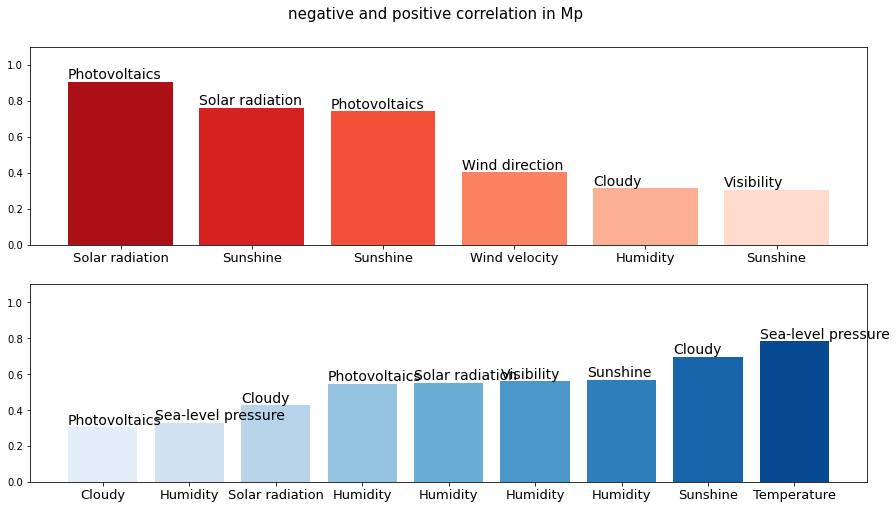

In [13]:
Mp_data = CorrBar(corr_Mp, Mp_cols, 'Mp')

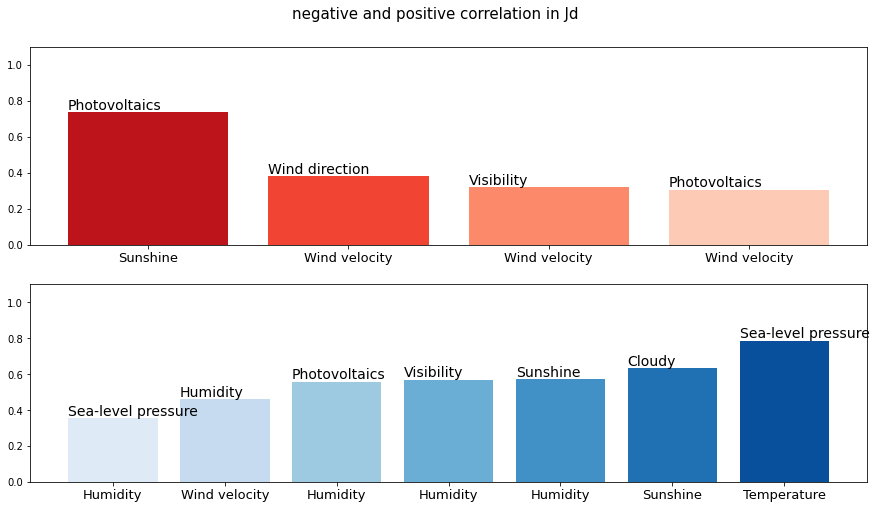

In [14]:
Jd_data = CorrBar(corr_Jd, Jd_cols, 'Jd')

In [15]:
corr_data = pd.concat([Mp_data, Jd_data], axis=1)
corr_data.columns = ['MokPo', 'corr', 'Jindo', 'corr']
corr_data.head(5)

,MokPo,corr,Jindo,corr
0,"(Solar radiation, Photovoltaics)",0.905388,"(Sunshine, Photovoltaics)",0.736036
1,"(Sunshine, Solar radiation)",0.761352,"(Wind velocity, Wind direction)",0.380613
2,"(Sunshine, Photovoltaics)",0.742563,"(Wind velocity, Visibility)",0.319314
3,"(Wind velocity, Wind direction)",0.402027,"(Wind velocity, Photovoltaics)",0.304520
4,"(Humidity, Cloudy)",0.315480,"(Sunshine, Visibility)",0.292865


In [16]:
corr_data.tail(10)

,MokPo,corr,Jindo,corr
45,"(Wind velocity, Humidity)",-0.283080,NaN,NaN
46,"(Cloudy, Photovoltaics)",-0.302351,NaN,NaN
47,"(Humidity, Sea-level pressure)",-0.329793,NaN,NaN
48,"(Solar radiation, Cloudy)",-0.425620,NaN,NaN
49,"(Humidity, Photovoltaics)",-0.545036,NaN,NaN
50,"(Humidity, Solar radiation)",-0.551881,NaN,NaN
51,"(Humidity, Visibility)",-0.560542,NaN,NaN
52,"(Humidity, Sunshine)",-0.567416,NaN,NaN
53,"(Sunshine, Cloudy)",-0.695374,NaN,NaN
54,"(Temperature, Sea-level pressure)",-0.783215,NaN,NaN


## Remove variables

In [17]:
print(Jd_df.shape)
Jd_df.isnull().sum()

(58118, 14)


Temperature             121
Wind velocity           133
Wind direction          339
Humidity                 88
Sea-level pressure      150
Sunshine              26535
Solar radiation       58118
Cloudy                37217
Visibility             6881
Time                      0
Date                      0
Power-plant               0
Photovoltaics             4
Month                     0
dtype: int64

In [18]:
print(Mp_df.shape)
Mp_df.isnull().sum()

(70127, 15)


Temperature              11
Precipitation         65045
Wind velocity             8
Wind direction          620
Humidity                473
Sea-level pressure        1
Sunshine              31980
Solar radiation       31762
Cloudy                 9005
Visibility             2350
Time                      0
Date                      0
Power-plant               0
Photovoltaics            12
Month                     0
dtype: int64

In [19]:
Mp_df.drop(columns=['Precipitation'], inplace=True)
Jd_df.drop(columns=['Solar radiation'], inplace=True)

In [20]:
Mp_df.drop(columns =['Solar radiation'], inplace=True) #상관관계가 높은 일조-일사 변수 중 진도 지역에 일조에 맞춰 일사만 제거 
Mp_df.head(3)

,Temperature,Wind velocity,Wind direction,Humidity,Sea-level pressure,Sunshine,Cloudy,Visibility,Time,Date,Power-plant,Photovoltaics,Month
0,7.2,5.7,320.0,66.0,1015.5,NaN,0.0,1100.0,0,2014-01-01,전남 영암군,0.0,1
1,6.5,5.3,340.0,72.0,1015.7,NaN,NaN,NaN,1,2014-01-01,전남 영암군,0.0,1
2,5.9,3.7,340.0,77.0,1015.9,NaN,NaN,NaN,2,2014-01-01,전남 영암군,0.0,1


In [21]:
Mp_cols.remove('Solar radiation')
Mp_cols.remove('Precipitation')
Jd_cols.remove('Solar radiation')

# Seasonal correlation

In [22]:
def SeasonSplit(area_df): 
  hot_season = pd.DataFrame()
  cold_season = pd.DataFrame()
  # high-temperature month
  for i in range(5,11):
    idx = area_df[area_df['Month'] == i].index
    data = area_df.loc[idx]
    hot_season = pd.concat([hot_season,data])
  # low-temperature month
  for i in [1,2,3,4,11,12]: 
    idx = area_df[area_df['Month'] == i].index
    data = area_df.loc[idx]
    cold_season = pd.concat([cold_season,data])
  hot_season.reset_index(drop=True, inplace=True)
  cold_season.reset_index(drop=True, inplace=True)
  return hot_season, cold_season

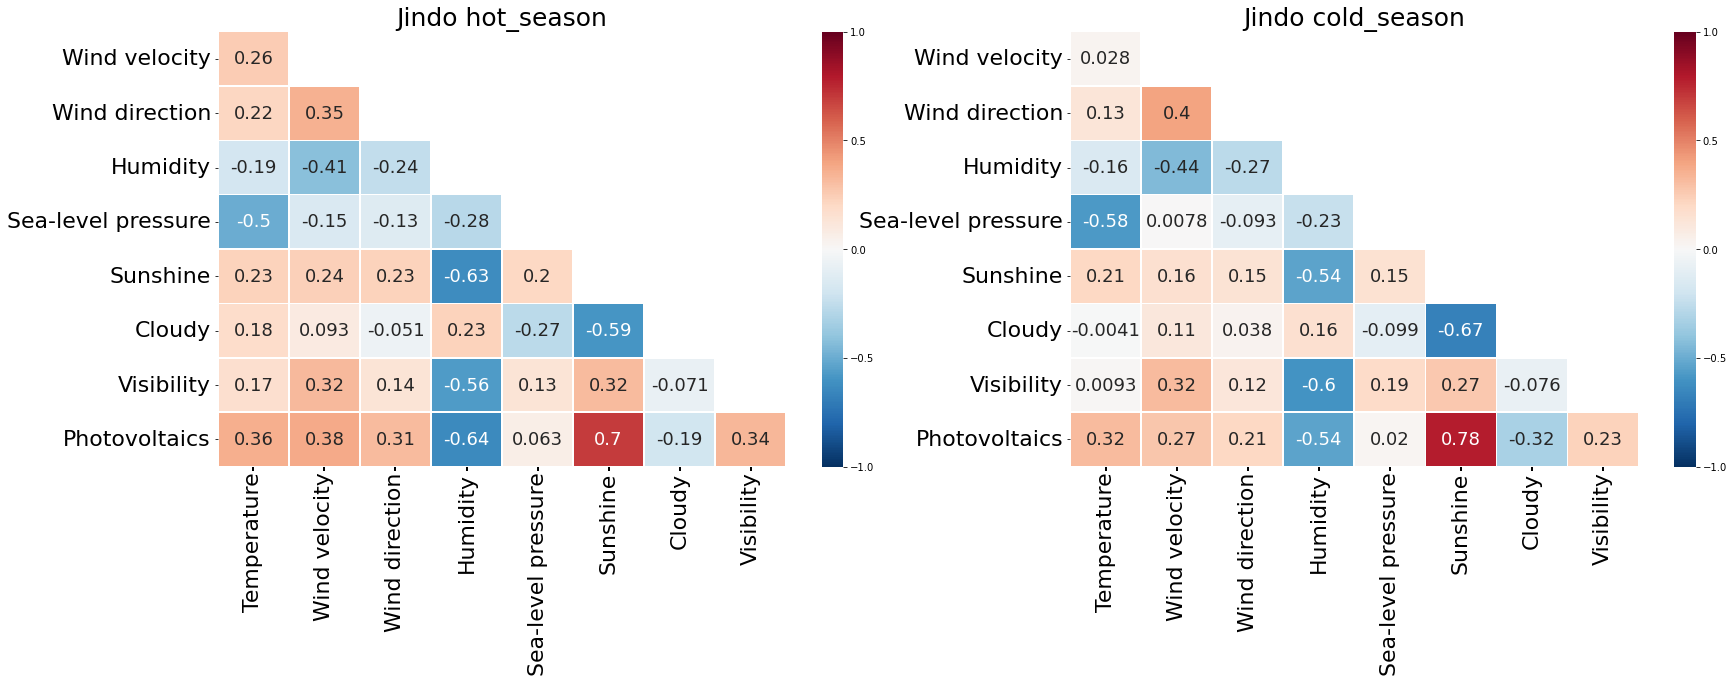

In [23]:
hot_season, cold_season = SeasonSplit(Jd_df)
fig, (ax1, ax2) = plt.subplots(figsize=(28,8), nrows=1, ncols=2)

ax1.set_title('Jindo hot_season', fontsize=25)
h = Correlation(hot_season, Jd_cols, ax1)

ax2.set_title('Jindo cold_season', fontsize=25)
C = Correlation(cold_season, Jd_cols, ax2)

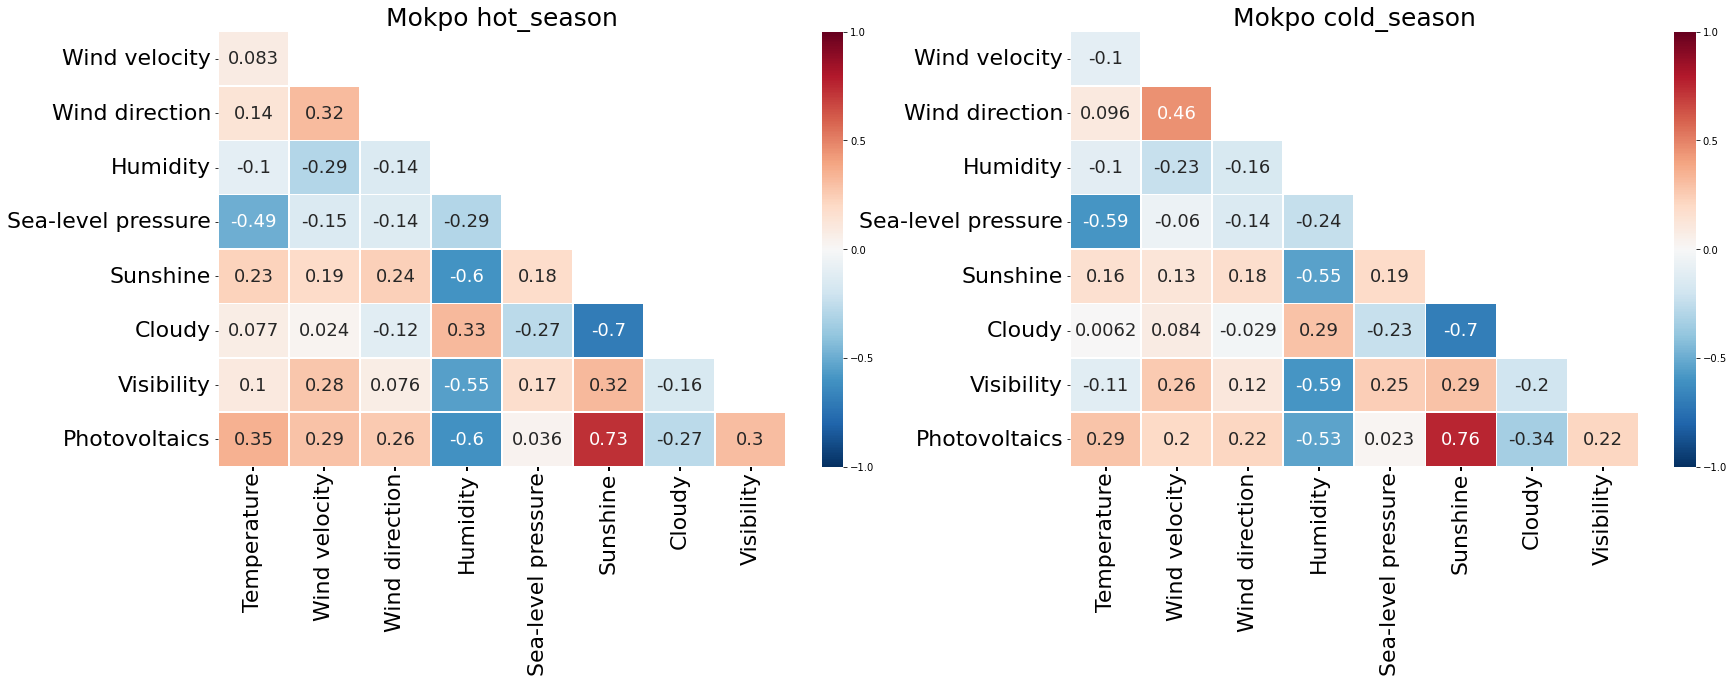

In [24]:
hot_season, cold_season = SeasonSplit(Mp_df)
fig, (ax1, ax2) = plt.subplots(figsize=(28,8), nrows=1, ncols=2)

ax1.set_title('Mokpo hot_season', fontsize=25)
h = Correlation(hot_season, Mp_cols, ax1)

ax2.set_title('Mokpo cold_season', fontsize=25)
C = Correlation(cold_season, Mp_cols, ax2)

# Save 

In [25]:
Mp_df.to_csv('/content/gdrive/MyDrive/SolarPower/Mp_df.csv', index=None) 
Jd_df.to_csv('/content/gdrive/MyDrive/SolarPower/Jd_df.csv', index=None) 